In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [136]:
df= pd.read_csv("UK-fatalities-reportable-under-riddor.csv")

In [137]:
df.head()

,Enforcing authority,Year\n[Note 1],Employment Status - overview \n[Note 2],Employment Status - detail,Age band,Gender of deceased person,Incident Type,Kind of accident,Top-level Industry (SIC section)\n[Note 3],Detailed industry (2-Digit SIC)\n[Note 3] [Note 4],Country,Region,LA Name (of incident location)
0,HSE,2017/18,Workers,Self Employed,35 - 44,Male,Non-fatal injury,Struck by object,Construction (F),41 Construction of buildings,England,North West,Trafford
1,HSE,2017/18,Workers,Employee,65 and over,Male,Fatality,Fall from height,Construction (F),41 Construction of buildings,England,East Midlands,West Northamptonshire
2,HSE,2017/18,Members of the public,MoP,55 - 59,Male,Non-fatal injury,Drowned or asphyxiated,Construction (F),41 Construction of buildings,England,West Midlands,Birmingham
3,HSE,2017/18,Workers,Employee,60 - 64,Male,Fatality,Fall from height,Construction (F),41 Construction of buildings,England,East of England,East Suffolk
4,HSE,2017/18,Workers,Employee,25 - 34,Male,Fatality,Fall from height,Construction (F),41 Construction of buildings,England,London,Greenwich


In [138]:
df.shape

(205, 13)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Enforcing authority                                205 non-null    object
 1   Year
[Note 1]                                      205 non-null    object
 2   Employment Status - overview 
[Note 2]             205 non-null    object
 3   Employment Status - detail                         205 non-null    object
 4   Age band                                           205 non-null    object
 5   Gender of deceased person                          205 non-null    object
 6   Incident Type                                      205 non-null    object
 7   Kind of accident                                   205 non-null    object
 8   Top-level Industry (SIC section)
[Note 3]          205 non-null    object
 9   Detailed industry (2-

In [140]:
df["Top-level Industry (SIC section)\n[Note 3]"].unique()

array(['Construction (F)'], dtype=object)

In [141]:
df = df[df['Top-level Industry (SIC section)\n[Note 3]'] == 'Construction (F)']

In [142]:
df.tail(2)

,Enforcing authority,Year\n[Note 1],Employment Status - overview \n[Note 2],Employment Status - detail,Age band,Gender of deceased person,Incident Type,Kind of accident,Top-level Industry (SIC section)\n[Note 3],Detailed industry (2-Digit SIC)\n[Note 3] [Note 4],Country,Region,LA Name (of incident location)
203,HSE,2021/22p,Workers,Employee,35 - 44,Male,Non-fatal injury,Trapped by something collapsing,Construction (F),43 Specialised construction activities,England,East of England,Thurrock
204,HSE,2021/22p,Workers,Employee,35 - 44,Male,Non-fatal injury,Struck by moving vehicle,Construction (F),43 Specialised construction activities,England,North West,Rochdale


In [143]:
df.reset_index(drop=True, inplace=True)

In [144]:
df.shape

(205, 13)

In [145]:
df.isnull().sum()

Enforcing authority                                   0
Year\n[Note 1]                                        0
Employment Status - overview \n[Note 2]               0
Employment Status - detail                            0
Age band                                              0
Gender of deceased person                             0
Incident Type                                         0
Kind of accident                                      0
Top-level Industry (SIC section)\n[Note 3]            0
Detailed industry (2-Digit SIC)\n[Note 3] [Note 4]    0
Country                                               0
Region                                                0
LA Name (of incident location)                        0
dtype: int64

In [146]:
df.head(2)

,Enforcing authority,Year\n[Note 1],Employment Status - overview \n[Note 2],Employment Status - detail,Age band,Gender of deceased person,Incident Type,Kind of accident,Top-level Industry (SIC section)\n[Note 3],Detailed industry (2-Digit SIC)\n[Note 3] [Note 4],Country,Region,LA Name (of incident location)
0,HSE,2017/18,Workers,Self Employed,35 - 44,Male,Non-fatal injury,Struck by object,Construction (F),41 Construction of buildings,England,North West,Trafford
1,HSE,2017/18,Workers,Employee,65 and over,Male,Fatality,Fall from height,Construction (F),41 Construction of buildings,England,East Midlands,West Northamptonshire


In [147]:
df= df.rename(columns={'Enforcing authority':'Enforcing_authority',
                      'Year\n[Note 1]':'Year',
                       'Employment Status - overview \n[Note 2]':'Employment_Status',
                        'Employment Status - detail':'Employment_Status_detail',
                        'Age band':'Age',
                       'Gender of deceased person':'Gender',
                       'Incident Type':'Incident_Type',
                       'Kind of accident':'Kind_of_accident',
                       'Top-level Industry (SIC section)\n[Note 3]':'Top_level_Industry',
                       'Detailed industry (2-Digit SIC)\n[Note 3] [Note 4]':'Detailed_industry',
                       'Country':'Country',
                       'Region':'Region',
                       'LA Name (of incident location)':'Incident_location'                   
                      })

In [148]:
df.head()

,Enforcing_authority,Year,Employment_Status,Employment_Status_detail,Age,Gender,Incident_Type,Kind_of_accident,Top_level_Industry,Detailed_industry,Country,Region,Incident_location
0,HSE,2017/18,Workers,Self Employed,35 - 44,Male,Non-fatal injury,Struck by object,Construction (F),41 Construction of buildings,England,North West,Trafford
1,HSE,2017/18,Workers,Employee,65 and over,Male,Fatality,Fall from height,Construction (F),41 Construction of buildings,England,East Midlands,West Northamptonshire
2,HSE,2017/18,Members of the public,MoP,55 - 59,Male,Non-fatal injury,Drowned or asphyxiated,Construction (F),41 Construction of buildings,England,West Midlands,Birmingham
3,HSE,2017/18,Workers,Employee,60 - 64,Male,Fatality,Fall from height,Construction (F),41 Construction of buildings,England,East of England,East Suffolk
4,HSE,2017/18,Workers,Employee,25 - 34,Male,Fatality,Fall from height,Construction (F),41 Construction of buildings,England,London,Greenwich


In [149]:
df["Employment_Status"].unique()

array(['Workers', 'Members of the public'], dtype=object)

In [150]:
df["Employment_Status_detail"].unique()

array(['Self Employed', 'Employee', 'MoP'], dtype=object)

In [151]:
df["Age"].unique()

array(['35 - 44', '65 and over', '55 - 59', '60 - 64', '25 - 34',
       '45 - 54', 'Under 16', '20 - 24', '16 - 19'], dtype=object)

In [152]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [153]:
df["Incident_Type"].unique()

array(['Non-fatal injury', 'Fatality', 'Non-work related',
       'Dangerous Occurrence'], dtype=object)

In [154]:
df["Kind_of_accident"].unique()

array(['Struck by object', 'Fall from height', 'Drowned or asphyxiated',
       'Trapped by something collapsing', 'Struck by moving vehicle',
       'Another kind of accident', 'Slip, trip, fall same level',
       'Exposed to explosion', 'Contact with machinery',
       'Contact with electricity', 'Exposed to fire', 'Struck against',
       'Exposure to harmful substance'], dtype=object)

In [155]:
df["Top_level_Industry"].unique()

array(['Construction (F)'], dtype=object)

In [156]:
df["Detailed_industry"].unique()

array(['41 Construction of buildings', '42 Civil engineering',
       '43 Specialised construction activities'], dtype=object)

In [157]:
df["Country"].unique()

array(['England', 'Scotland', 'Wales'], dtype=object)

In [158]:
df["Region"].unique()

array(['North West', 'East Midlands', 'West Midlands', 'East of England',
       'London', 'Scotland', 'Yorkshire and The Humber', 'North East',
       'South East', 'South West', 'Wales'], dtype=object)

In [159]:
df["Incident_location"].unique()

array(['Trafford', 'West Northamptonshire', 'Birmingham', 'East Suffolk',
       'Greenwich', 'Derbyshire Dales', 'Dumfries and Galloway', 'Leeds',
       'North Northamptonshire', 'South Lanarkshire', 'Stockport',
       'Bexley', 'York', 'Durham', 'Oxford', 'South Cambridgeshire',
       'Sheffield', 'Bristol', 'Bedford', 'Braintree', 'South Hams',
       'Burnley', 'South Gloucestershire', 'Anglesey', 'Dudley',
       'Liverpool', 'South Kesteven', 'Kensington and Chelsea', 'Cardiff',
       'Luton', 'Cheshire East', 'Three Rivers', 'North Lanarkshire',
       'Woking', 'Kings Lynn and West Norfolk', 'Thurrock', 'Islington',
       'Tower Hamlets', 'Rugby', 'Brighton and Hove', 'Blackpool',
       'Lambeth', 'Richmond upon Thames', 'Westminster', 'Spelthorne',
       'Bath and North East Somerset', 'Runnymede', 'Walsall',
       'Eastleigh', 'Warwick', 'Orkney Islands', 'Broxbourne', 'Fife',
       'Haringey', 'Central Bedfordshire', 'Aberdeen',
       'Perth and Kinross', 'Falkirk'

Percentage for default

Incident_Type
Non-fatal injury        61.46
Fatality                21.95
Dangerous Occurrence     8.78
Non-work related         7.80
Name: proportion, dtype: float64


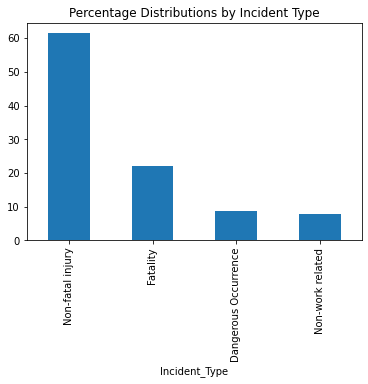

In [160]:
print('Percentage for default\n')
print(round(df.Incident_Type.value_counts(normalize=True)*100,2))
round(df.Incident_Type.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by Incident Type')
plt.show()

In [161]:
df.columns

Index(['Enforcing_authority', 'Year', 'Employment_Status',
       'Employment_Status_detail', 'Age', 'Gender', 'Incident_Type',
       'Kind_of_accident', 'Top_level_Industry', 'Detailed_industry',
       'Country', 'Region', 'Incident_location'],
      dtype='object')

In [162]:
df=df.drop(["Enforcing_authority", "Employment_Status", "Employment_Status_detail", "Top_level_Industry","Detailed_industry",
           "Incident_location"], axis=1)

In [163]:
df.head()

,Year,Age,Gender,Incident_Type,Kind_of_accident,Country,Region
0,2017/18,35 - 44,Male,Non-fatal injury,Struck by object,England,North West
1,2017/18,65 and over,Male,Fatality,Fall from height,England,East Midlands
2,2017/18,55 - 59,Male,Non-fatal injury,Drowned or asphyxiated,England,West Midlands
3,2017/18,60 - 64,Male,Fatality,Fall from height,England,East of England
4,2017/18,25 - 34,Male,Fatality,Fall from height,England,London


In [164]:
# Apply first level cleaning
import re
import string

trigger = 'Kind_of_accident'

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [165]:
df['Kind_of_accident1'] = pd.DataFrame(df.Kind_of_accident.apply(cleaned1))
df.head(1)

,Year,Age,Gender,Incident_Type,Kind_of_accident,Country,Region,Kind_of_accident1
0,2017/18,35 - 44,Male,Non-fatal injury,Struck by object,England,North West,struck by object


In [166]:
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [167]:
df['Kind_of_accident2'] = pd.DataFrame(df.Kind_of_accident1.apply(cleaned1))
df.head(1)

,Year,Age,Gender,Incident_Type,Kind_of_accident,Country,Region,Kind_of_accident1,Kind_of_accident2
0,2017/18,35 - 44,Male,Non-fatal injury,Struck by object,England,North West,struck by object,struck by object


In [168]:
df=df.drop(["Kind_of_accident","Kind_of_accident1"], axis=1)

In [169]:
df.head(1)

,Year,Age,Gender,Incident_Type,Country,Region,Kind_of_accident2
0,2017/18,35 - 44,Male,Non-fatal injury,England,North West,struck by object


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               205 non-null    object
 1   Age                205 non-null    object
 2   Gender             205 non-null    object
 3   Incident_Type      205 non-null    object
 4   Country            205 non-null    object
 5   Region             205 non-null    object
 6   Kind_of_accident2  205 non-null    object
dtypes: object(7)
memory usage: 11.3+ KB


In [171]:
df['Kind_of_accident2'] = df['Kind_of_accident2'].astype(str)

In [172]:
tokenizer = df['Kind_of_accident2']
print(tokenizer)

0                     struck by object
1                     fall from height
2               drowned or asphyxiated
3                     fall from height
4                     fall from height
                    ...               
200           struck by moving vehicle
201    trapped by something collapsing
202                   fall from height
203    trapped by something collapsing
204           struck by moving vehicle
Name: Kind_of_accident2, Length: 205, dtype: object


In [173]:
from sklearn.preprocessing import LabelEncoder

In [174]:
label_encoder = LabelEncoder()
df['Incident_Type'] = label_encoder.fit_transform(df['Incident_Type'])
df['Incident_Type'].unique()

array([2, 1, 3, 0])

In [175]:
df['Incident_Type'].value_counts() 

Incident_Type
2    126
1     45
0     18
3     16
Name: count, dtype: int64

## Sentiment analysis using TfidfVectorizer

In [176]:
from sklearn.model_selection import train_test_split

Independent_var = df.Kind_of_accident2
Dependent_var = df.Incident_Type

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.20, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 164
IV_test  : 41
DV_train : 164
DV_test  : 41


In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [178]:
## Create TfidfVectorizer and LogisticRegression objects
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

In [186]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 3, 10, 22,  6],
       [ 0,  0,  0,  0]], dtype=int64)

In [187]:
print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.5365853658536586
Precision :  1.0
Recall :  0.5365853658536586


In [183]:
df.tail(20)

,Year,Age,Gender,Incident_Type,Country,Region,Kind_of_accident2
185,2021/22p,45 - 54,Male,2,England,South East,contact with electricity
186,2021/22p,60 - 64,Male,2,England,South East,contact with electricity
187,2021/22p,55 - 59,Male,2,England,London,fall from height
188,2021/22p,45 - 54,Male,0,England,London,fall from height
189,2021/22p,65 and over,Female,2,England,East of England,exposed to fire
190,2021/22p,25 - 34,Male,2,England,Yorkshire and The Humber,fall from height
191,2021/22p,60 - 64,Male,2,England,South West,fall from height
192,2021/22p,65 and over,Male,2,Scotland,Scotland,fall from height
193,2021/22p,25 - 34,Male,3,England,East Midlands,contact with machinery
194,2021/22p,60 - 64,Male,3,Scotland,Scotland,fall from height


In [185]:
example = ["fall from height"]
result = model.predict(example)
print(result)

[2]


## VADER Sentiment Scoring

In [188]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [191]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Kind_of_accident2']
    myid = row['Incident_Type']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/205 [00:00<?, ?it/s]

In [192]:
vaders = pd.DataFrame(res).T ## reading polarity score as a dataframe 
vaders = vaders.reset_index().rename(columns={'index': 'Incident_Type'})
vaders = vaders.merge(df, how='left') ## merging vaders dataframe with original dataframe

In [193]:
vaders.tail()

,Incident_Type,neg,neu,pos,compound,Year,Age,Gender,Country,Region,Kind_of_accident2
200,0,0.0,1.0,0.0,0.0,2021/22p,16 - 19,Male,England,North West,fall from height
201,0,0.0,1.0,0.0,0.0,2021/22p,25 - 34,Male,England,London,trapped by something collapsing
202,0,0.0,1.0,0.0,0.0,2021/22p,25 - 34,Male,England,London,struck by object
203,0,0.0,1.0,0.0,0.0,2021/22p,65 and over,Male,England,Yorkshire and The Humber,fall from height
204,0,0.0,1.0,0.0,0.0,2021/22p,45 - 54,Male,England,East Midlands,fall from height


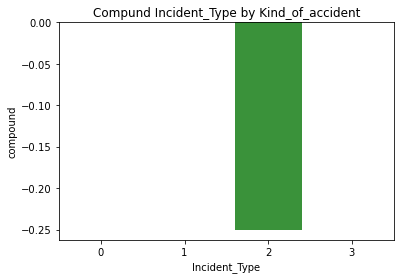

In [194]:
ax = sns.barplot(data=vaders, x='Incident_Type', y='compound')
ax.set_title('Compund Incident_Type by Kind_of_accident')
plt.show()

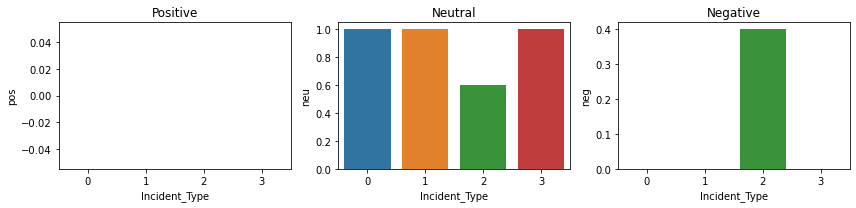

In [195]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Incident_Type', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Incident_Type', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Incident_Type', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()